# Ionosphere_Classification model

In [52]:
#import libiraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

#ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [53]:
#read csv file

data= pd.read_csv('Ionosphere.csv')
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


In [54]:
data['Class'].unique()

array([1, 0], dtype=int64)

In [55]:
data.shape

(351, 35)

In [56]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'Class'],
      dtype='object')

# Data Cleaning And Preparation

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      351 non-null    int64  
 1   V2      351 non-null    int64  
 2   V3      351 non-null    float64
 3   V4      351 non-null    float64
 4   V5      351 non-null    float64
 5   V6      351 non-null    float64
 6   V7      351 non-null    float64
 7   V8      351 non-null    float64
 8   V9      351 non-null    float64
 9   V10     351 non-null    float64
 10  V11     351 non-null    float64
 11  V12     351 non-null    float64
 12  V13     351 non-null    float64
 13  V14     351 non-null    float64
 14  V15     351 non-null    float64
 15  V16     351 non-null    float64
 16  V17     351 non-null    float64
 17  V18     351 non-null    float64
 18  V19     351 non-null    float64
 19  V20     351 non-null    float64
 20  V21     351 non-null    float64
 21  V22     351 non-null    float64
 22  V2

In [58]:
#checking missing value

data.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
V29      0
V30      0
V31      0
V32      0
V33      0
V34      0
Class    0
dtype: int64

In [59]:
#feature columns

X= data.drop(['Class'],axis=1)

In [60]:
#target column

y=data['Class']

# Model Building 

### Train And Test data split

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.3 ,random_state = 45)

### Standardising

In [62]:
#fiting the model using MinMax scaler

#from sklearn.preprocessing import MinMaxScaler
#scaler= MinMaxScaler()
#X_train=scaler.fit_transform(X_train)      

In [63]:
#RFE feature selection method to select best features

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logreg= LogisticRegression()
rfe= RFE(logreg,10)
rfe=rfe.fit(X_train,y_train)

In [64]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('V1', True, 1),
 ('V2', False, 25),
 ('V3', True, 1),
 ('V4', False, 18),
 ('V5', True, 1),
 ('V6', False, 17),
 ('V7', True, 1),
 ('V8', True, 1),
 ('V9', False, 8),
 ('V10', False, 2),
 ('V11', False, 15),
 ('V12', False, 23),
 ('V13', False, 19),
 ('V14', False, 5),
 ('V15', False, 16),
 ('V16', False, 13),
 ('V17', False, 22),
 ('V18', False, 10),
 ('V19', False, 9),
 ('V20', False, 21),
 ('V21', False, 11),
 ('V22', True, 1),
 ('V23', False, 12),
 ('V24', False, 20),
 ('V25', False, 4),
 ('V26', False, 3),
 ('V27', True, 1),
 ('V28', False, 24),
 ('V29', False, 6),
 ('V30', True, 1),
 ('V31', True, 1),
 ('V32', False, 14),
 ('V33', False, 7),
 ('V34', True, 1)]

In [65]:
#feature selected columns

col=X_train.columns[rfe.support_]
X_train=X_train[col]
X_train

,V1,V3,V5,V7,V8,V22,V27,V30,V31,V34
100,1,1.00000,0.00000,0.77941,-0.99265,0.00000,-1.00000,-1.00000,1.00000,0.00000
255,1,0.83427,0.54040,0.12326,0.89402,-0.89064,0.83008,0.49079,0.37542,0.79444
171,1,1.00000,1.00000,0.66667,0.11111,-0.11111,0.90347,0.11111,0.88889,0.00000
22,1,0.96071,1.00000,1.00000,0.09313,-0.07905,0.58051,-0.01251,0.51310,-0.00182
133,1,0.34694,0.46939,0.40816,0.20408,0.44898,-0.46579,0.18367,-0.34694,-0.24490
...,...,...,...,...,...,...,...,...,...,...
163,1,0.85209,0.38887,0.08858,0.98903,-0.80496,0.71698,0.58310,0.19667,0.64933
213,1,1.00000,1.00000,1.00000,0.71429,-0.28571,1.00000,0.05182,1.00000,0.00000
95,1,0.79157,0.00000,0.56541,0.06874,0.38803,-0.34146,0.69401,-1.00000,0.00000
32,1,0.88208,0.93408,0.92100,-0.16450,-0.47153,0.56804,-0.59854,0.47075,-0.58086


In [66]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
logm1=sm.GLM(y_train,X_train_sm, family =sm.families.Binomial())
res=logm1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                  245
Model:                            GLM   Df Residuals:                      234
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -49.750
Date:                Sun, 14 Feb 2021   Deviance:                       99.500
Time:                        11:31:38   Pearson chi2:                     219.
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -30.0973   1.58e+04     -0.002      0.9

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif["VIF"]=[variance_inflation_factor(X_train.values,i)for i in range(X_train.shape[1])]
vif["VIF"]=round(vif['VIF'])
vif=vif.sort_values(by="VIF",ascending =False)
vif

,Features,VIF
0,V1,4.0
1,V3,4.0
2,V5,4.0
3,V7,4.0
4,V8,2.0
6,V27,2.0
8,V31,2.0
5,V22,1.0
7,V30,1.0
9,V34,1.0


In [68]:
#drop p values >0.5

X_train.drop('V1',axis=1,inplace =True)

In [69]:
X_train_sm=sm.add_constant(X_train)
logm1=sm.GLM(y_train,X_train_sm, family =sm.families.Binomial())
res=logm1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                  245
Model:                            GLM   Df Residuals:                      235
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63.836
Date:                Sun, 14 Feb 2021   Deviance:                       127.67
Time:                        11:31:38   Pearson chi2:                     243.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7850      0.573     -4.863      0.0

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif["VIF"]=[variance_inflation_factor(X_train.values,i)for i in range(X_train.shape[1])]
vif["VIF"]=round(vif['VIF'])
vif=vif.sort_values(by="VIF",ascending =False)
vif

,Features,VIF
1,V5,4.0
2,V7,4.0
0,V3,3.0
3,V8,2.0
5,V27,2.0
7,V31,2.0
4,V22,1.0
6,V30,1.0
8,V34,1.0


In [72]:
X_train.drop('V7',axis=1,inplace =True)

In [73]:
X_train_sm=sm.add_constant(X_train)
logm1=sm.GLM(y_train,X_train_sm, family =sm.families.Binomial())
res=logm1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                  245
Model:                            GLM   Df Residuals:                      236
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -65.444
Date:                Sun, 14 Feb 2021   Deviance:                       130.89
Time:                        11:33:18   Pearson chi2:                     211.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7428      0.592     -4.631      0.0

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif["VIF"]=[variance_inflation_factor(X_train.values,i)for i in range(X_train.shape[1])]
vif["VIF"]=round(vif['VIF'])
vif=vif.sort_values(by="VIF",ascending =False)
vif

,Features,VIF
0,V3,3.0
1,V5,3.0
2,V8,2.0
4,V27,2.0
6,V31,2.0
3,V22,1.0
5,V30,1.0
7,V34,1.0


In [75]:
X_train.drop('V34',axis=1,inplace =True)

In [76]:
X_train_sm=sm.add_constant(X_train)
logm1=sm.GLM(y_train,X_train_sm, family =sm.families.Binomial())
res=logm1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                  245
Model:                            GLM   Df Residuals:                      237
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -67.194
Date:                Sun, 14 Feb 2021   Deviance:                       134.39
Time:                        11:33:51   Pearson chi2:                     269.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6219      0.555     -4.728      0.0

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif["VIF"]=[variance_inflation_factor(X_train.values,i)for i in range(X_train.shape[1])]
vif["VIF"]=round(vif['VIF'])
vif=vif.sort_values(by="VIF",ascending =False)
vif

,Features,VIF
0,V3,3.0
1,V5,3.0
4,V27,2.0
6,V31,2.0
2,V8,1.0
3,V22,1.0
5,V30,1.0


# Prediction

In [78]:
#probability prediction for target 

y_train_prd=res.predict(X_train_sm)
y_train_prd[:10]

100    0.935903
255    0.991204
171    0.975870
22     0.964362
133    0.474089
212    0.003787
173    0.991162
118    0.000590
337    0.996545
317    0.885870
dtype: float64

In [79]:
y_train_prd.values.shape

(245,)

In [80]:
#dataframe with convertwd value and predicted probability

y_train_prd_1=pd.DataFrame({"Converted": y_train.values, 
                               "Conversion_prob": y_train_prd})
y_train_prd_1.head(10)

,Converted,Conversion_prob
100,0,0.935903
255,1,0.991204
171,1,0.975870
22,1,0.964362
133,1,0.474089
212,0,0.003787
173,1,0.991162
118,0,0.000590
337,1,0.996545
317,1,0.885870


In [85]:
#add column for Predicted value 

y_train_prd_1["Predicted"]=y_train_prd_1['Conversion_prob'].map(lambda x: 1 if x>0.5 else 0)
y_train_prd_1.head()

,Converted,Conversion_prob,Predicted
100,0,0.935903,1
255,1,0.991204,1
171,1,0.975870,1
22,1,0.964362,1
133,1,0.474089,0


In [88]:
#confusion matrics 

from sklearn import metrics
conf_mtr=metrics.confusion_matrix(y_train_prd_1['Converted'],y_train_prd_1['Predicted'])
conf_mtr

array([[ 69,  16],
       [ 10, 150]], dtype=int64)

In [90]:
#accuracy of confusion matrics 
#accuracy <80 - good score

metrics.accuracy_score(y_train_prd_1['Converted'],y_train_prd_1['Predicted'] )

0.8938775510204081

In [92]:
#sensitivity
#sensitivity < 70% is good  

(conf_mtr[1,1]/(conf_mtr[1,1]+conf_mtr[1,0]))*100   #model has good sensitivity 

93.75

In [94]:
#specificity
# greater than 60% is good specificity

(conf_mtr[0,0]/(conf_mtr[0,0]+conf_mtr[0,1]))*100   #the model has good specificity

81.17647058823529

# ROC 

In [102]:
def draw_roc(actual,probs):
    fpr,tpr,thresholds= metrics.roc_curve(actual,probs,drop_intermediate=False)
    accuracy_score= metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(6,6))
    plt.plot(fpr,tpr,label= "ROC Curve (area=%0.2f)"  % accuracy_score)
    plt.plot([0,1],[0,1],"k--")
    plt.xlim(0.0,1.0)
    plt.ylim(0.0,1.0)
    plt.legend(loc="lower right")
    plt.show()
    return None

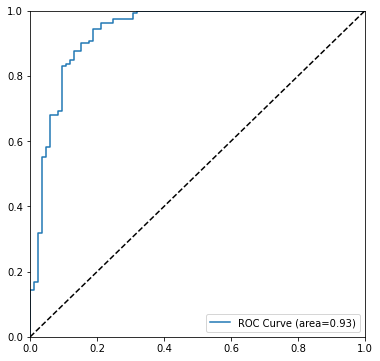

In [103]:
fpr,tpr,thresholds= metrics.roc_curve(y_train_prd_1['Converted'],y_train_prd_1['Conversion_prob'] )
draw_roc(y_train_prd_1['Converted'],y_train_prd_1['Conversion_prob'])

In [104]:
num=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [105]:
for i in num :
    y_train_prd_1[i]= y_train_prd_1['Conversion_prob'].map(lambda x: 1 if x>i else 0)
cutoff= pd.DataFrame(columns=["Prob","Accuracy","Sensitivity","Specificity"])

In [107]:
for i in num:
    cm1= metrics.confusion_matrix(y_train_prd_1['Converted'], y_train_prd_1[i])
    total= sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total
    Sensitivity= cm1[1,1]/(cm1[1,1]+cm1[1,0])
    Specificity= cm1[0,0]/(cm1[0,0]+cm1[0,1])
    cutoff.loc[i]=[i,Accuracy,Sensitivity,Specificity]

In [108]:
cutoff

,Prob,Accuracy,Sensitivity,Specificity
0.0,0.0,0.653061,1.00000,0.000000
0.1,0.1,0.844898,1.00000,0.552941
0.2,0.2,0.877551,1.00000,0.647059
0.3,0.3,0.881633,0.98125,0.694118
0.4,0.4,0.897959,0.97500,0.752941
0.5,0.5,0.893878,0.93750,0.811765
0.6,0.6,0.877551,0.90625,0.823529
0.7,0.7,0.869388,0.87500,0.858824
0.8,0.8,0.853061,0.82500,0.905882
0.9,0.9,0.767347,0.68750,0.917647


<Figure size 1080x576 with 0 Axes>

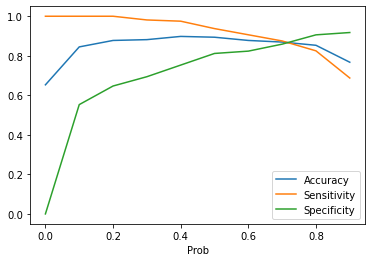

In [109]:
plt.figure(figsize=(15,8))
cutoff.plot.line(x="Prob", y=["Accuracy","Sensitivity","Specificity"])

# KneighborsClassifier

In [112]:
X_train.head()

,V3,V5,V8,V22,V27,V30,V31
100,1.00000,0.00000,-0.99265,0.00000,-1.00000,-1.00000,1.00000
255,0.83427,0.54040,0.89402,-0.89064,0.83008,0.49079,0.37542
171,1.00000,1.00000,0.11111,-0.11111,0.90347,0.11111,0.88889
22,0.96071,1.00000,0.09313,-0.07905,0.58051,-0.01251,0.51310
133,0.34694,0.46939,0.20408,0.44898,-0.46579,0.18367,-0.34694


In [119]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [121]:
#probability prediction for target 

y_train_prd=knn.predict(X_train)
y_train_prd

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1], dtype=int64)

In [122]:
y_train_prd=pd.DataFrame(y_train_prd)

In [126]:
data= pd.concat([y_train_prd,data],axis=1)

In [127]:
data

,0,0,V1,V2,V3,V4,V5,V6,V7,V8,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,0.0,0.0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1.0,1.0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1.0,1.0,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1.0,1.0,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1.0,1.0,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,NaN,NaN,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
347,NaN,NaN,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
348,NaN,NaN,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
349,NaN,NaN,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1
